# Convolutional Neural Networks

In this notebook, we will show an example that we will follow step by step to understand the basic concepts of convolutional networks such as:
- Kernel Size
- Padding
- Stride
- Pooling
- Flatten Layer

Convolutional Neural Networks are very similar to ordinary Neural Networks. They are made up of neurons that have learnable weights and biases. Each neuron reveices some inputs, perfom a dot product and optionally follows it with a non-linearity. So, what changes?

Convolutional networks make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. The layers of a Convulutional networks have neurons arranged in three dimensions: width, height and depth.

Example: If the input image has dimensions 32x32x3, we have an input of  32 (width) x 32 (height) x 3 (depth: Red, Green, Blue channels).

## Convolutional Layer

Intuitively, we could say that the main purpose of a convolutional layer is to detect visual features or characteristics in images. Another important feature is that convolutional layers can learn spatial hierarchies of patterns. That is, if we had a convolutional network, the first layer could learn fundamental elements like edges, the second could learn composite elements of basic elements learned in the previous layer, and so on. In general, convolutional layers operate with 3D tensors, called feature maps, with two spatial axes referring to height and width, and another axis referring to the channel/depth.

<center><img src="https://drive.google.com/uc?id=1bSVBGzpW176Ttfsp5ZCYRV7oA8P2NuU6" style="float:left; padding:0.7em"width=500/>
<figcaption style="text-align: center"><strong>Fig. 1: Schematic Diagram of a Convolutional Neural Network for Image Recognition: Decoding the 'Cat'. Source: Deep Learning with Python Book</strong></figcaption></center>





In this example, we observe an input of size 6x6, and a 6x6 feature map (output) is created. In this case, our kernel size is 3x3, referring to the dimensions of the sliding window over the input. The choice of this hyperparameter has a significant impact on image classification tasks.

For example, small kernel sizes are able to extract a much larger amount of information containing highly local features from the input. Smaller kernel size also leads to a smaller reduction in layer dimensions, which allows for a deeper architecture. Conversely, a large kernel size extracts less information, which leads to a faster reduction in layer dimensions, often leading to worse performance. Large kernels are better suited to extract features that are larger.

The kernel moves one pixel at a time in both vertical and horizontal directions, a movement known as the "stride." A larger stride leads to a smaller output size. Additionally, you can observe that the kernel shifts one position further along each axis due to the use of "padding" in the input. Padding involves adding zeros (zero-padding) around the input images, resulting in a larger output compared to not applying padding.



<img src="https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif" style="width:150; float:left; padding:0.7em"/>
<figcaption style="text-align: center"><strong>Fig. 2: 2D Convolution Example. Source: https://en.m.wikipedia.org/wiki/File:2D_Convolution_Animation.gif</strong></figcaption>


## Pooling

Typically, pooling layers are used following a convolutional layer.Their primary purpose is to simplify the information gathered by the convolutional layer and create a condensed version of the contained information.

There are various ways to apply pooling, with the most common being max-pooling. Max-pooling is an operation that calculates the maximum value for patches of a feature map and uses it to create a downsampled (pooled) feature map. Max-pooling introduces a degree of translation invariance, meaning that minor translations of the image do not significantly impact the values of most pooled outputs.

<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png?20180226194350" style="width:150; float:left; padding:0.7em"/>
<figcaption style="text-align: center"><strong>Fig. 3: Max-pooling example. Source: https://computersciencewiki.org/index.php/File:MaxpoolSample2.png</strong></figcaption>



In [1]:
#@title Viz
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches, animation
from IPython.display import HTML
import ipywidgets as widget
from ipywidgets import interact


def plot_convolution(input_size, padding, kernel_size, stride):
    # Calculate the output size
    output_size = ((input_size - kernel_size + 2 * padding) // stride) + 1

    # Create the padded input matrix
    padded_input_size = input_size + 2 * padding

    # Fill the input matrix with random values and apply padding
    input_matrix = np.zeros((padded_input_size, padded_input_size))
    input_matrix[padding:padded_input_size - padding, padding:padded_input_size - padding] = np.random.rand(input_size, input_size)

    # Create the output matrix
    output_matrix = np.zeros((output_size, output_size))

    # Define a sample kernel with weights
    kernel = np.array([[0.1, 0.2, 0.1], [0.2, 0.3, 0.2], [-0.1, -0.2, -0.1]])
    if kernel_size != 3:
        kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
        kernel[-1] = -kernel[-1]

    vmin = -1
    vmax = 1

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Input matrix visualization
    ax[0].set_title(f"Input ({input_size}, {input_size})\nAfter-padding ({padded_input_size}, {padded_input_size})")
    im_input = ax[0].imshow(input_matrix, cmap='viridis', vmin=vmin, vmax=vmax)  # Use viridis colormap

    # Output matrix visualization
    ax[1].set_title(f"Output ({output_size}, {output_size})")
    im_output = ax[1].imshow(output_matrix, cmap='viridis', vmin=vmin, vmax=vmax)  # Use viridis colormap

    # Kernel visualization
    kernel_rect = patches.Rectangle((-0.5, -0.5), kernel_size, kernel_size, fill=False, edgecolor='red', lw=2)
    ax[0].add_patch(kernel_rect)

    # Function to update the animation
    def update(frame):
        nonlocal kernel_rect
        if frame == 0:
            return im_input, im_output, kernel_rect
        else:
            i, j = divmod(frame - 1, output_size)
            i, j = i * stride, j * stride  # Adjust index according to the stride
            if i + kernel_size <= padded_input_size and j + kernel_size <= padded_input_size:
                input_slice = input_matrix[i:i + kernel_size, j:j + kernel_size]
                output_value = np.sum(input_slice * kernel)
                output_matrix[i // stride, j // stride] = output_value
                im_output.set_data(output_matrix)

                kernel_rect.set_xy((j - 0.5, i - 0.5))
        return im_input, im_output, kernel_rect

    num_frames = output_size * output_size + 1
    ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=True, repeat=False)

    plt.close(fig)
    return HTML(ani.to_jshtml())

input_size_slider = widget.IntSlider(min=1, max=20, step=1, value=4, description='Input Size')
padding_slider = widget.IntSlider(min=0, max=5, step=1, value=1, description='Padding')
kernel_size_slider = widget.IntSlider(min=1, max=7, step=1, value=2, description='Kernel Size')
stride_slider = widget.IntSlider(min=1, max=5, step=1, value=1, description='Stride')

interact(plot_convolution, input_size=input_size_slider, padding=padding_slider,
         kernel_size=kernel_size_slider, stride=stride_slider)

interactive(children=(IntSlider(value=4, description='Input Size', max=20, min=1), IntSlider(value=1, descript…

<function __main__.plot_convolution(input_size, padding, kernel_size, stride)>

# **Exercise 1: Basic Convolution Operation**

## 1) Apply a simple 2D convolution operation without padding and with a stride of 1.

Input Matrix:
$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix}
$
Kernel:
$
\begin{bmatrix}
-1 &0 &1 \\
-2 &0 &2 \\
-1 &0 &1
\end{bmatrix}
$

Hint:

* $Output \ Size = [\frac{Input \ Size \ - \ Kernel \ Size\ +\ 2 \ \times \ Padding}{Stride}] + 1$

**Questions:**

1. What is the output matrix after applying the convolution?
2. Describe the effect of the kernel on the input image. What feature does this kernel help to detect?

**Respuestas:**

**1.** Aplicando la fórmula del tamaño de salida:

$$Output \ Size = \frac{3 - 3 + 2 \times 0}{1} + 1 = 1$$

La salida es una matriz de 1x1. Realizando la convolución (producto elemento a elemento y suma):

$$1 \cdot (-1) + 2 \cdot 0 + 3 \cdot 1 + 4 \cdot (-2) + 5 \cdot 0 + 6 \cdot 2 + 7 \cdot (-1) + 8 \cdot 0 + 9 \cdot 1 = -1 + 0 + 3 - 8 + 0 + 12 - 7 + 0 + 9 = 8$$

$$Output = \begin{bmatrix} 8 \end{bmatrix}$$

**2.** Este kernel es un **filtro Sobel horizontal**, utilizado para la detección de bordes verticales en imágenes. Funciona calculando la diferencia entre los valores de los píxeles de la izquierda y la derecha, ponderando más la fila central. De esta forma, resalta los cambios bruscos de intensidad en la dirección horizontal, lo que se traduce en la detección de bordes verticales en la imagen.

## 2) Apply a 2D convolution operation with padding (1 layer of zero padding) and a stride of 1.

Input Matrix:
$
\begin{bmatrix}
1 &0& 2\\
3 &0& 4\\
5 &6& 0
\end{bmatrix}
$
Kernel:
$
\begin{bmatrix}
0 &1& 0 \\
1 &-4& 1\\
0 &1& 0
\end{bmatrix}
$

**Questions:**

1. What is the output matrix after applying the convolution with padding?
2. How does padding affect the size of the output compared to the input?

**Respuestas:**

**1.** Con padding=1, la entrada se rodea de ceros, resultando en una entrada expandida de 5x5:

$$
Padded \ Input = \begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 2 & 0 \\
0 & 3 & 0 & 4 & 0 \\
0 & 5 & 6 & 0 & 0 \\
0 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

El tamaño de salida será:

$$Output \ Size = \frac{3 - 3 + 2 \times 1}{1} + 1 = 3$$

Calculando cada posición de la salida 3x3:

$$
Output = \begin{bmatrix}
-1 & 3 & -4 \\
-6 & 13 & -14 \\
-11 & -19 & 10
\end{bmatrix}
$$

Por ejemplo, para la posición (0,0): $0 \cdot 0 + 0 \cdot 1 + 0 \cdot 0 + 0 \cdot 1 + 1 \cdot (-4) + 0 \cdot 1 + 0 \cdot 0 + 3 \cdot 1 + 0 \cdot 0 = -1$

Y para la posición central (1,1): $1 \cdot 0 + 0 \cdot 1 + 2 \cdot 0 + 3 \cdot 1 + 0 \cdot (-4) + 4 \cdot 1 + 5 \cdot 0 + 6 \cdot 1 + 0 \cdot 0 = 13$

**2.** El padding mantiene las dimensiones espaciales de la salida iguales a las de la entrada original (3x3 → 3x3). Sin padding, la salida se reduciría a 1x1 (como vimos en el ejercicio anterior). Esto es especialmente útil en redes profundas, donde sin padding las dimensiones se reducirían drásticamente en cada capa, perdiendo información de los bordes de la imagen. Además, este kernel en concreto es un **filtro Laplaciano**, que detecta bordes en todas las direcciones calculando la diferencia entre un píxel central y sus vecinos directos.

## 3) Apply a 2D convolution operation with a stride of 2 and no padding.

Input Matrix:
$
\begin{bmatrix}
1 &1& 2& 4\\
2 &2& 3& 5\\
3 &3& 1& 0\\
4 &4& 0& 0
\end{bmatrix}
$
Kernel:
$
\begin{bmatrix}
1&-1\\
-1&1
\end{bmatrix}
$

**Questions:**

1. What is the output matrix after applying the convolution with a stride of 2?
2. Explain how changing the stride of the convolution affects the size and the representation of the output.

**Respuestas:**

**1.** El tamaño de salida con stride=2 y sin padding:

$$Output \ Size = \frac{4 - 2 + 2 \times 0}{2} + 1 = 2$$

La salida es una matriz 2x2. El kernel se desplaza de 2 en 2 posiciones:

* Posición (0,0): $1 \cdot 1 + 1 \cdot (-1) + 2 \cdot (-1) + 2 \cdot 1 = 0$
* Posición (0,1): $2 \cdot 1 + 4 \cdot (-1) + 3 \cdot (-1) + 5 \cdot 1 = 0$
* Posición (1,0): $3 \cdot 1 + 3 \cdot (-1) + 4 \cdot (-1) + 4 \cdot 1 = 0$
* Posición (1,1): $1 \cdot 1 + 0 \cdot (-1) + 0 \cdot (-1) + 0 \cdot 1 = 1$

$$
Output = \begin{bmatrix}
0 & 0 \\
0 & 1
\end{bmatrix}
$$

**2.** Aumentar el stride reduce significativamente el tamaño de la salida, ya que el kernel se desplaza más posiciones en cada paso, muestreando menos regiones de la entrada. En este caso, con stride=2 pasamos de una entrada 4x4 a una salida 2x2, es decir, se reduce a la mitad en cada dimensión. Esto tiene un efecto similar al pooling, reduciendo la resolución espacial y por tanto la cantidad de información que se conserva, lo que resulta en una representación más comprimida. Un stride mayor implica menor solapamiento entre las regiones del kernel, lo que puede llevar a perder detalles finos pero a cambio reduce el coste computacional.

# **Exercise 2: 3D Convolution Operation**

Determine the kernel size, stride, and padding settings for two 3D convolutional layers to achieve a specific output volume size from a given input volume.

Input volume dimensions: 8x8x8 (Width x Height x Depth)

**Two convolutional layers**

Output volume dimensions: 2x2x2 (Width x Height x Depth)

Constraints:

* You may only use cubic kernels (same width, height, and depth).
* Stride must be the same in all three directions (width, height, depth).
* Use zero padding (padding with zeros around the input volume).

**Questions:**

1. What kernel size, stride, and padding settings should be used for each of the two convolutional layers to achieve the 2x2x2 output volume from the 8x8x8 input volume?
2. Is there more than one combination of settings that could achieve the target output volume? If so, provide an alternative set of parameters.

**Respuestas:**

Utilizando la fórmula $Output = \frac{Input - Kernel + 2 \times Padding}{Stride} + 1$ en las tres dimensiones (ya que todo es cúbico):

**1. Combinación principal:**

* **Capa 1:** kernel=3, stride=2, padding=1
$$\frac{8 - 3 + 2 \times 1}{2} + 1 = \frac{7}{2} + 1 = 4 \quad \Rightarrow \quad Output: \ 4 \times 4 \times 4$$

* **Capa 2:** kernel=3, stride=2, padding=1
$$\frac{4 - 3 + 2 \times 1}{2} + 1 = \frac{3}{2} + 1 = 2 \quad \Rightarrow \quad Output: \ 2 \times 2 \times 2 \checkmark$$

**2. Sí, existen combinaciones alternativas:**

* **Alternativa A:**
    * Capa 1: kernel=5, stride=1, padding=0 → $(8-5)/1 + 1 = 4$ → Output: $4 \times 4 \times 4$
    * Capa 2: kernel=3, stride=1, padding=0 → $(4-3)/1 + 1 = 2$ → Output: $2 \times 2 \times 2$ $\checkmark$

* **Alternativa B:**
    * Capa 1: kernel=3, stride=1, padding=0 → $(8-3)/1 + 1 = 6$ → Output: $6 \times 6 \times 6$
    * Capa 2: kernel=5, stride=1, padding=0 → $(6-5)/1 + 1 = 2$ → Output: $2 \times 2 \times 2$ $\checkmark$

Existen múltiples combinaciones válidas siempre que al encadenar las dos capas se pase de 8x8x8 a 2x2x2. La elección entre ellas dependerá de factores como el coste computacional (kernels más grandes son más costosos) y la capacidad de extracción de características que necesitemos.

## 3) Practical Case

In this exercise, we will implement a convolutional network for the classification of 3D objects from the ModelNet10 dataset. For this, we will use the PyTorch library.

In [2]:
#@title Imports

!pip install trimesh
import os
import h5py
import glob
import keras
import trimesh
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.metrics import confusion_matrix

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
# Make Plotly robust across VS Code notebooks / Colab extension
_renderers = [r for r in ("vscode", "plotly_mimetype", "notebook_connected", "colab") if r in pio.renderers]
pio.renderers.default = "+".join(_renderers) if _renderers else "browser"
print("Plotly renderer:", pio.renderers.default)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 740.3/740.3 kB 22.4 MB/s eta 0:00:00
Plotly renderer: vscode+plotly_mimetype+notebook_connected+colab


El dataset [ModelNet10](https://modelnet.cs.princeton.edu/) esta desarrollado por [Princeton Vision and Robotics Group](https://3dvision.princeton.edu/projects/2014/3DShapeNets/paper.pdf). El dataset original esta compuesto por 660 clases de objetos diferentes y 151.128 3D CAD models. La variante ModelNet10 en cambio esta compuesta por 10 clases y 4.899 CAD models

In [3]:
#@title Download Dataset
DATA_DIR = keras.utils.get_file(fname="modelnet.zip",
    cache_dir=os.path.abspath("."),
    origin="http://3dvision.princeton.edu/projects/2014/3DShapeNets/ModelNet10.zip",
    extract=True
)
DATA_DIR = os.path.join(os.path.dirname(DATA_DIR), "modelnet_extracted/ModelNet10")

473402300/473402300 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


In [ ]:
#@title Preprocess Dataset

def parse_dataset(num_points=2048, num_classes = 4):
    train_points = []
    train_labels = []
    test_points = []
    test_labels = []
    class_map = {}
    folders = glob.glob(os.path.join(DATA_DIR, "[!README]*"))


    for i, folder in enumerate(folders):
        if i >= num_classes:
            break

        print("processing class: {}".format(os.path.basename(folder)))
        class_map[i] = folder.split("/")[-1]
        train_files = glob.glob(os.path.join(folder, "train/*"))
        test_files = glob.glob(os.path.join(folder, "test/*"))

        for f in train_files:
            train_points.append(trimesh.load(f).sample(num_points))
            train_labels.append(i)

        for f in test_files:
            test_points.append(trimesh.load(f).sample(num_points))
            test_labels.append(i)

    return (
        np.array(train_points),
        np.array(test_points),
        np.array(train_labels),
        np.array(test_labels),
        class_map,
    )

# Converts the continuous point cloud data into a discrete 3D array
def voxelize(points, grid_size=24):
    # Normalize points to [0, 1]
    min_bound = np.min(points, axis=1, keepdims=True)
    max_bound = np.max(points, axis=1, keepdims=True)
    points_normalized = (points - min_bound) / (max_bound - min_bound)

    # Scale to grid size
    points_scaled = np.floor(points_normalized * grid_size).astype(np.int32)
    points_scaled = np.clip(points_scaled, 0, grid_size-1)  # Ensure points are within the grid

    # Create voxel grid
    voxel_grid = np.zeros((points.shape[0], grid_size, grid_size, grid_size), dtype=np.float32)
    for i, point_set in enumerate(points_scaled):
        voxel_grid[i, point_set[:, 0], point_set[:, 1], point_set[:, 2]] = 1.0

    return voxel_grid

In [5]:
NUM_POINTS = 2048
NUM_CLASSES = 4 # Max: 10
BATCH_SIZE = 32

train_points, test_points, train_labels, test_labels, CLASS_MAP = parse_dataset(NUM_POINTS, NUM_CLASSES)

# Voxelizing the point clouds
train_voxels = voxelize(train_points,24)
test_voxels = voxelize(test_points)

processing class: desk
processing class: sofa
processing class: bathtub
processing class: bed


The PyTorch DataLoader class is a utility class that is used to load data from a dataset and create mini-batches for training deep learning models. It is designed to handle large datasets and perform data augmentation, shuffling, and other preprocessing tasks.

In [6]:
import torch
from torch.utils.data import Dataset, DataLoader

class PointCloudDataset(Dataset):
    def __init__(self, voxels, labels):
        self.voxels = voxels
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.voxels[idx], self.labels[idx]

# One-hot encoding the labels
train_labels_one_hot = np.eye(len(CLASS_MAP))[train_labels]
test_labels_one_hot = np.eye(len(CLASS_MAP))[test_labels]

# Creating datasets
train_dataset = PointCloudDataset(train_voxels, torch.tensor(train_labels_one_hot, dtype=torch.long))
test_dataset = PointCloudDataset(test_voxels, torch.tensor(test_labels_one_hot, dtype=torch.long))

# Creating dataloaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

### Plot sample

In [7]:
def plot_point_cloud(xyz, rgb=None, alpha=1.0):
    """Plot point cloud with alpha channel"""
    fig = go.Figure()
    fig.add_trace(
        go.Scatter3d(
            x=xyz[:, 0],
            y=xyz[:, 1],
            z=xyz[:, 2],
            mode="markers",
            marker=dict(color=rgb, size=2, opacity=alpha),
        )
    )
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    try:
        fig.show(renderer=pio.renderers.default)
    except Exception:
        fig.show(renderer="browser")

# plot a point cloud
plot_point_cloud(train_points[1000], alpha=0.6)

In [8]:
class Conv3DNet(nn.Module):
    def __init__(self):
        """
        Convolutional 3D Network.

        This network consists of multiple convolutional layers followed by max pooling,
        and a fully connected layer for classification.

        Attributes:
            features (nn.Sequential): Sequential module containing the convolutional layers.
            classifier (nn.Sequential): Sequential module containing the fully connected layers.
            Flatten (torch.nn.Flatten): Flatten module to flatten the input tensor.
        """
        super(Conv3DNet, self).__init__()

                                                                    # Input: [batch_size, 1, 24, 24, 24]
        self.features = nn.Sequential(
            nn.Conv3d(1, 16, kernel_size=3, stride=1, padding=0),   # Output: [batch_size, 16, 22, 22, 22]
            nn.ReLU(),
            nn.MaxPool3d(2),                                        # Output: [batch_size, 16, 11, 11, 11]
            nn.Conv3d(16, 32, kernel_size=3, stride=1, padding=0),  # Output: [batch_size, 32, 9, 9, 9]
            nn.ReLU(),
            nn.MaxPool3d(2),                                        # Output: [batch_size, 32, 4, 4, 4]
            nn.Conv3d(32, 64, kernel_size=3, stride=1, padding=0),  # Output: [batch_size, 64, 2, 2, 2]
            nn.ReLU(),
            nn.MaxPool3d(2)                                         # Output: [batch_size, 64, 1, 1, 1]
        )

        self.classifier = nn.Sequential(
            nn.Linear(64, 512),                                     # Output: [batch_size, 512]
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, NUM_CLASSES)                             # Output: [batch_size, num_classes]
        )

        self.Flatten = torch.nn.Flatten()

    def forward(self, x):
        """
        Forward pass of the Conv3DNet.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, channels, depth, height, width).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, num_classes) after applying softmax.
        """
        x = self.features(x)
        x = self.Flatten(x)
        x = self.classifier(x)
        return F.log_softmax(x, dim=1)

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Conv3DNet()
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(10):  # number of epochs
    model.train()
    for data, target in train_loader:
        data = data.unsqueeze(1)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, torch.max(target, 1)[1])
        loss.backward()
        optimizer.step()
    print("Epoch: {}, Loss: {:.4f}".format(epoch, loss.item()))

Epoch: 0, Loss: 0.8350
Epoch: 1, Loss: 0.2373
Epoch: 2, Loss: 0.2758
Epoch: 3, Loss: 0.0579
Epoch: 4, Loss: 0.0518
Epoch: 5, Loss: 0.3113
Epoch: 6, Loss: 0.1353
Epoch: 7, Loss: 0.1985
Epoch: 8, Loss: 0.0885
Epoch: 9, Loss: 0.0290


In [10]:
# Create classification matrix with all test data
model.eval()
all_preds = []
all_targets = []
with torch.no_grad():
    for data, target in test_loader:
        data = data.unsqueeze(1)
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.max(1, keepdim=True)[1]
        all_preds.extend(pred.cpu().numpy())
        all_targets.extend(target.cpu().numpy())

# Remove one hot encoding
all_targets = np.argmax(all_targets, axis=1)
all_preds = np.array(all_preds).flatten()

In [11]:
# Plot fail cases
fail_cases = np.where(all_preds != all_targets)[0]
for i in range(3):
    idx = fail_cases[i]
    print("Predicted: {}, Target: {}".format(CLASS_MAP[all_preds[idx]], CLASS_MAP[all_targets[idx]]))
    plot_point_cloud(test_points[idx], alpha=0.6)

Predicted: sofa, Target: desk


Predicted: bed, Target: desk


Predicted: sofa, Target: desk


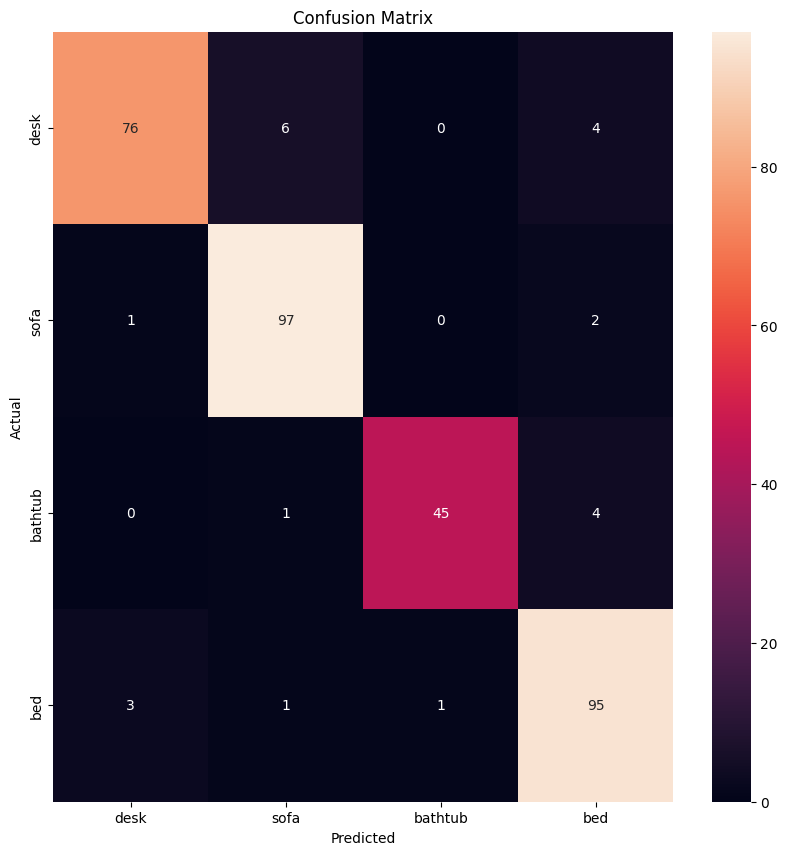

In [12]:
cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=CLASS_MAP.values(), yticklabels=CLASS_MAP.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Exercise

As you can see in the Conv3DNet class, comments indicating the output size for each layer have been provided. Now, use different values for kernel size, padding, and stride to generate an output with the shape [32, 128, 4, 4, 4] -> [batch_size, channels, depth, height, width]. Comment on every line with the output.

Finally, train your new network and discuss the results.

In [13]:
class ModifiedConv3DNet(nn.Module):
    def __init__(self):
        super(ModifiedConv3DNet, self).__init__()
        # Input: [batch_size, 1, 24, 24, 24]
        self.features = nn.Sequential(

            nn.Conv3d(1, 32, kernel_size=5, stride=1, padding=0),   # Output: [batch_size, 32, 20, 20, 20]
            nn.ReLU(),
            nn.MaxPool3d(2),                                        # Output: [batch_size, 32, 10, 10, 10]

            nn.Conv3d(32, 64, kernel_size=3, stride=1, padding=0),  # Output: [batch_size, 64, 8, 8, 8]
            nn.ReLU(),
            nn.MaxPool3d(2),                                        # Output: [batch_size, 64, 4, 4, 4]

            nn.Conv3d(64, 128, kernel_size=3, stride=1, padding=1), # Output: [batch_size, 128, 4, 4, 4]
            nn.ReLU(),
            nn.MaxPool3d(1)                                         # Output: [batch_size, 128, 4, 4, 4]
        )

        self.classifier = nn.Sequential(
            nn.Linear(128 * 4 * 4 * 4, 512),                       # Output: [batch_size, 512]
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, NUM_CLASSES)                             # Output: [batch_size, NUM_CLASSES]
        )

        self.Flatten = torch.nn.Flatten()

    def forward(self, x):
        x = self.features(x)
        x = self.Flatten(x)
        x = self.classifier(x)
        return F.log_softmax(x, dim=1)

In [ ]:
# Entrenamiento del modelo modificado
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modified_model = ModifiedConv3DNet()
modified_model.to(device)

optimizer = optim.Adam(modified_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

for epoch in range(10):
    modified_model.train()
    for data, target in train_loader:
        data = data.unsqueeze(1)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = modified_model(data)
        loss = criterion(output, torch.max(target, 1)[1])
        loss.backward()
        optimizer.step()
    print("Epoch: {}, Loss: {:.4f}".format(epoch, loss.item()))

Epoch: 0, Loss: 0.3723
Epoch: 1, Loss: 0.2181
Epoch: 2, Loss: 0.2078
Epoch: 3, Loss: 0.0116
Epoch: 4, Loss: 0.0825


In [ ]:
# Evaluación del modelo modificado
modified_model.eval()
mod_preds = []
mod_targets = []
with torch.no_grad():
    for data, target in test_loader:
        data = data.unsqueeze(1)
        data, target = data.to(device), target.to(device)
        output = modified_model(data)
        pred = output.max(1, keepdim=True)[1]
        mod_preds.extend(pred.cpu().numpy())
        mod_targets.extend(target.cpu().numpy())

mod_targets = np.argmax(mod_targets, axis=1)
mod_preds = np.array(mod_preds).flatten()

# Matriz de confusión
cm_mod = confusion_matrix(mod_targets, mod_preds)
plt.figure(figsize=(10, 10))
sns.heatmap(cm_mod, annot=True, fmt="d", xticklabels=CLASS_MAP.values(), yticklabels=CLASS_MAP.values())
plt.title("Confusion Matrix - Modified Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy
accuracy_mod = np.mean(mod_preds == mod_targets)
print(f"Accuracy del modelo modificado: {accuracy_mod:.4f}")

### Discusión de resultados

En el modelo modificado se han utilizado valores diferentes de kernel size, padding y stride para alcanzar una salida de [batch_size, 128, 4, 4, 4] en la capa de features. Los principales cambios respecto al modelo original son:

* **Kernel más grande en la primera capa (5x5x5 vs 3x3x3):** Esto permite capturar patrones espaciales más amplios desde el inicio, reduciendo las dimensiones de 24 a 20 directamente con la convolución.

* **Mayor número de canales en la última capa convolucional (128 vs 64):** Esto proporciona una representación más rica de las características extraídas, ya que el modelo dispone de más filtros para aprender distintos patrones.

* **Capa Flatten más grande (8192 vs 64):** Al mantener dimensiones espaciales de 4x4x4 con 128 canales, el vector aplanado es significativamente mayor, lo que le da al clasificador más información para tomar decisiones.

En general, este modelo tiene más parámetros que el original, lo que puede mejorar su capacidad de representación pero también incrementa el riesgo de overfitting y el coste computacional. Es importante observar la matriz de confusión para evaluar si el aumento de complejidad se traduce en una mejora real del rendimiento en las distintas clases.

# Convolution Exercise

In [ ]:
def convolution(input, kernel, stride, padding):
    input = np.array(input, dtype=np.float64)
    kernel = np.array(kernel, dtype=np.float64)

    # Aplicar zero-padding
    if padding > 0:
        input = np.pad(input, padding, mode='constant', constant_values=0)

    input_h, input_w = input.shape
    kernel_h, kernel_w = kernel.shape

    # Calcular dimensiones de salida
    output_h = (input_h - kernel_h) // stride + 1
    output_w = (input_w - kernel_w) // stride + 1

    output = np.zeros((output_h, output_w))

    for i in range(output_h):
        for j in range(output_w):
            region = input[i * stride : i * stride + kernel_h,
                           j * stride : j * stride + kernel_w]
            output[i, j] = np.sum(region * kernel)

    return output

# Verificación con los ejercicios anteriores
# Ejercicio 1.1
x1 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
k1 = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
print("Ejercicio 1.1:", convolution(x1, k1, stride=1, padding=0))

# Ejercicio 1.2
x2 = [[1, 0, 2], [3, 0, 4], [5, 6, 0]]
k2 = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
print("Ejercicio 1.2:\n", convolution(x2, k2, stride=1, padding=1))

# Ejercicio 1.3
x3 = [[1, 1, 2, 4], [2, 2, 3, 5], [3, 3, 1, 0], [4, 4, 0, 0]]
k3 = [[1, -1], [-1, 1]]
print("Ejercicio 1.3:\n", convolution(x3, k3, stride=2, padding=0))

# Verificación con PyTorch
'''
x_trans = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=1, bias=False, padding=0)
with torch.no_grad():  # Deshabilitar gradientes porque estamos asignando manualmente
    x_trans.weight.copy_(torch.tensor(kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0))
input = torch.tensor(x, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
print(x_trans(input)) # batch_size, channels, height, width
'''